In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data = pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [73]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdcc8a7750>,
      dtype=object)

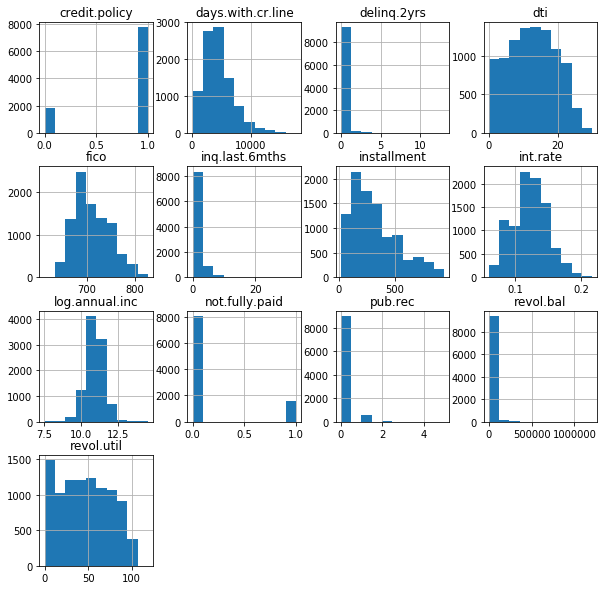

In [74]:
data.hist(figsize=(10,10))

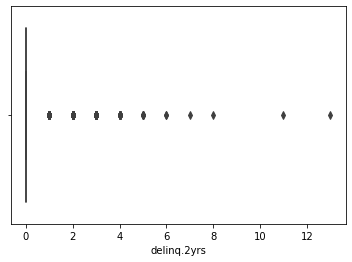

In [75]:
sns.boxplot(data['delinq.2yrs'])

In [76]:
data = data.drop('delinq.2yrs', axis = 1)

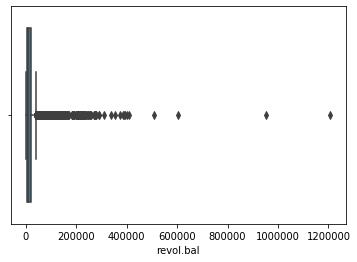

In [77]:
sns.boxplot(data['revol.bal'])

In [78]:
data = data[data['revol.bal'] < 250000]

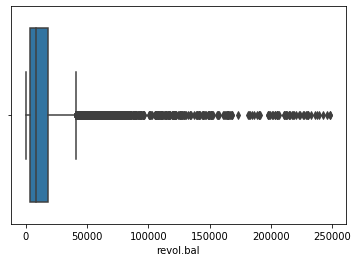

In [79]:
sns.boxplot(data['revol.bal'])

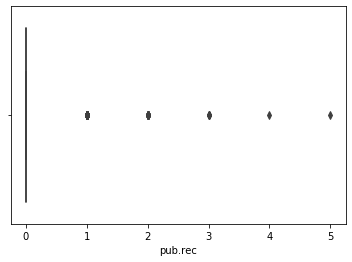

In [80]:
sns.boxplot(data['pub.rec'])

In [81]:
data = data.drop('pub.rec', axis = 1)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9552 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9552 non-null   int64  
 1   purpose            9552 non-null   object 
 2   int.rate           9552 non-null   float64
 3   installment        9552 non-null   float64
 4   log.annual.inc     9552 non-null   float64
 5   dti                9552 non-null   float64
 6   fico               9552 non-null   int64  
 7   days.with.cr.line  9552 non-null   float64
 8   revol.bal          9552 non-null   int64  
 9   revol.util         9552 non-null   float64
 10  inq.last.6mths     9552 non-null   int64  
 11  not.fully.paid     9552 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 970.1+ KB


In [83]:
data_numerical = data.drop(['purpose', 'not.fully.paid', 'credit.policy'], axis = 1)
data_categorical = data[['purpose', 'not.fully.paid', 'credit.policy']]

In [84]:
data_standard = (data_numerical.max() - data_numerical) / (data_numerical.max() - data_numerical.min())

In [85]:
data_comp = pd.concat([data_categorical, data_standard], axis = 1)
dummies = pd.get_dummies(data_comp['purpose'])
data_comp = pd.concat([data_comp, dummies], axis = 1).drop('purpose', axis = 1)
data_comp.head()

,not.fully.paid,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0.623402,0.120112,0.455238,0.349800,0.418605,0.687246,0.883878,0.562185,1.000000,0,0,1,0,0,0,0
1,0,1,0.698849,0.770084,0.493666,0.523031,0.558140,0.852182,0.864685,0.355462,1.000000,0,1,0,0,0,0,0
2,0,1,0.515985,0.620117,0.595180,0.611816,0.674419,0.740505,0.985870,0.784874,0.969697,0,0,1,0,0,0,0
3,0,1,0.739130,0.841347,0.455238,0.729640,0.534884,0.855621,0.864508,0.384874,0.969697,0,0,1,0,0,0,0
4,0,1,0.471867,0.905622,0.462497,0.500334,0.744186,0.777387,0.980924,0.668067,1.000000,0,1,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdae7438d0>,
      dtype=object)

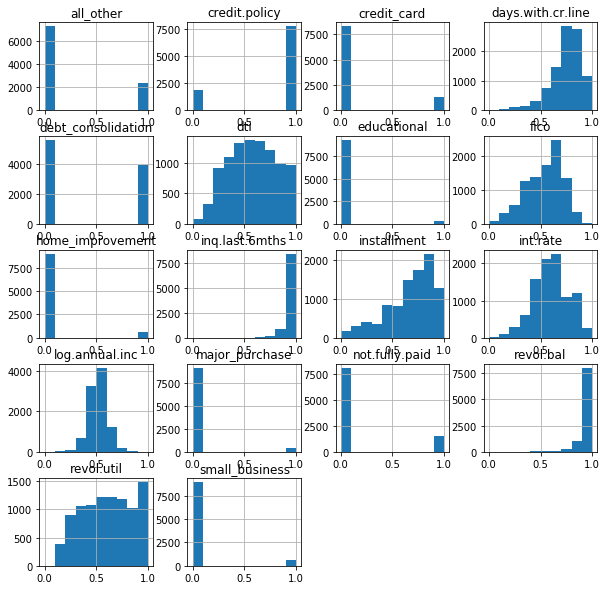

In [86]:
data_comp.hist(figsize = (10,10))

In [87]:
X = data_comp.drop('not.fully.paid', axis =1)
y = data_comp['not.fully.paid']

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
5698,1,0.812020,0.501433,0.473167,0.814753,0.232558,0.618519,0.992386,0.955462,0.939394,0,1,0,0,0,0,0
3661,1,0.643223,0.374150,0.483050,0.439920,0.465116,0.809232,0.877769,0.528571,1.000000,0,0,0,0,0,0,1
6968,1,0.493606,0.236882,0.451906,0.388184,0.581395,0.792046,0.938997,0.255462,0.969697,0,1,0,0,0,0,0
3633,1,0.643223,0.178632,0.447050,0.498331,0.348837,0.436401,0.820754,0.497479,1.000000,0,0,1,0,0,0,0
3642,1,0.582481,0.654937,0.543207,0.702937,0.627907,0.895138,0.963144,0.560504,0.939394,0,0,1,0,0,0,0


In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
fitted = model.fit(X_train, y_train)

In [95]:
y_pred = fitted.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
y_test

4935    0
4740    0
6176    0
2140    0
9271    0
       ..
372     0
6297    0
3935    0
1052    0
6109    0
Name: not.fully.paid, Length: 2388, dtype: int64

In [97]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[1993    7]
 [ 383    5]]


In [98]:
fitted.score(X_test, y_test)

0.8366834170854272